### Merging all csv files into one dataframe

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
base_path = '/Users/mathiaspoulsen/Python-projects/docker_notebooks/notebooks/my_work/exam-selenium-momondo-tester/'



italy_df = pd.read_csv(base_path + 'exam-data/flight-scrape-single-5-maj-118cy.csv')
cypern_df = pd.read_csv(base_path + 'exam-data/flight-scrape-single-5-maj-63cy.csv')
france_df = pd.read_csv(base_path + 'exam-data/flight-scrape-single-5-maj-82cy.csv')
spain_df = pd.read_csv(base_path + 'exam-data/flight-scrape-single-5-maj-225cy.csv')
greece_df = pd.read_csv(base_path + 'exam-data/flight-scrape-single-5-maj-94cy.csv')



path = "exam-data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

df = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    df = pd.concat([df, current_data])





In [2]:
#frames = [italy_df, cypern_df, france_df, spain_df, greece_df]
#result_df = pd.concat(frames)
#result_df
df

,Unnamed: 0,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp
0,0,94cy,14 juli,3t. 10min.,direkte,17:30–21:40,Aegean Airlines,\n1.105 kr.,https://kayak.dk/book/flight?code=LPHiEvhQsj.X...,20220505-1359
1,1,94cy,14 juli,3t. 15min.,direkte,18:30–22:45,SAS,\n1.590 kr.,https://kayak.dk/book/flight?code=LPHiEvhQsj.g...,20220505-1359
2,2,94cy,14 juli,3t. 15min.,direkte,08:10–12:25,SAS,\n2.340 kr.,https://kayak.dk/book/flight?code=LPHiEvhQsj.g...,20220505-1359
3,3,94cy,14 juli,3t. 15min.,direkte,10:15–14:30,SAS,\n2.419 kr.,https://kayak.dk/book/flight?code=LPHiEvhQsj.x...,20220505-1359
4,4,94cy,14 juli,6t. 45min.,1 stop IST,18:55–02:40+1,Turkish Airlines,\n1.984 kr.,https://kayak.dk/book/flight?code=LPHiEvhQsj.g...,20220505-1359
...,...,...,...,...,...,...,...,...,...,...
101,101,63cy,14 juli,8t. 40min.,1 stop FRA,06:20–16:00,Lufthansa,\n4.025 kr.,https://kayak.dk/book/flight?code=LPFiN81zF6.4...,20220505-1334
102,102,63cy,14 juli,8t. 50min.,1 stop ZRH,09:25–19:15,SWISS,\n4.294 kr.,https://kayak.dk/book/flight?code=LPFiN81zF6.t...,20220505-1334
103,103,63cy,14 juli,9t. 55min.,"2 stop OSL, FRA",15:25–02:20+1,"SAS, Lufthansa",\n4.387 kr.,https://kayak.dk/book/flight?code=LPFiN81zF6.G...,20220505-1334
104,104,63cy,14 juli,7t. 35min.,1 stop SKG,07:00–15:35,"SAS, Aegean Airlines",\n4.679 kr.,https://kayak.dk/book/flight?code=LPFiN81zF6.t...,20220505-1334


In [3]:
#Check for duplicated entries
boolean = df.duplicated().any()
print(boolean)

False


### Converting price to number

In [4]:
df['Price'] = [x[1:-5].replace(".","") for x in df['Price']]
df['Price'] = pd.to_numeric(df['Price'])

In [5]:
df = df.sort_values(by=['Price'], ascending=False)

In [6]:
df['Price']

25     5203
105    4784
83     4730
104    4679
82     4667
       ... 
2       493
0       471
17      463
2       418
2       417
Name: Price, Length: 545, dtype: int64

In [7]:
df["Price"].mean()

1741.332110091743

### Converting Company names to list

In [8]:
#Wizz Air, Ryanair
#["Wizz Air","Ryanair"]
def manipulate_list(x):
    x = '["' + x + '"]' 
    x = x.replace(', ', '","')
    return x

df['temp Company names'] = df['Company names']
df['temp Company names'] = df['Company names'].apply(manipulate_list)
df['temp Company names'] = df['temp Company names'].apply(eval)
df['temp Company names']




25                      [Lufthansa]
105    [Lufthansa, Aegean Airlines]
83           [SAS, Aegean Airlines]
104          [SAS, Aegean Airlines]
82                          [SWISS]
                   ...             
2                        [Wizz Air]
0                        [Wizz Air]
17                       [Wizz Air]
2               [Wizz Air, Ryanair]
2               [Wizz Air, Ryanair]
Name: temp Company names, Length: 545, dtype: object

In [9]:
#checking if the type is list
for i, l in enumerate(df['temp Company names']):
    print(type(l))
    break

<class 'list'>


### How many times does a company appear in our dataset?

In [10]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

to_1D(df['temp Company names']).value_counts()

Lufthansa             85
Ryanair               85
Aegean Airlines       64
SAS                   51
easyJet               43
Norwegian             40
Wizz Air              34
KLM                   32
Vueling               25
SWISS                 25
Austrian Airlines     21
Air France            18
Finnair               16
LOT                   15
British Airways       15
Flere flyselskaber    14
Eurowings             13
Brussels Airlines     11
Air Serbia             7
airBaltic              6
Turkish Airlines       5
Volotea                4
Pegasus Airlines       4
Croatia Airlines       4
Iberia                 4
TAP AIR PORTUGAL       3
CityJet                2
Air Europa             2
Arkia                  2
ITA Airways            2
Olympic Air            1
Cyprus Airways         1
dtype: int64

In [11]:
df['Company names']


25                      Lufthansa
105    Lufthansa, Aegean Airlines
83           SAS, Aegean Airlines
104          SAS, Aegean Airlines
82                          SWISS
                  ...            
2                        Wizz Air
0                        Wizz Air
17                       Wizz Air
2               Wizz Air, Ryanair
2               Wizz Air, Ryanair
Name: Company names, Length: 545, dtype: object

In [12]:

df['Company names'].mask(df['Company names'].str.contains(','), 'Flere flyselskaber', inplace=True)
df.head(50)


,Unnamed: 0,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names
25,25,94cy,14 juli,4t. 50min.,1 stop MUC,12:45–18:35,Lufthansa,5203,https://kayak.dk/book/flight?code=LPHiEvhQsj.Z...,20220505-1359,[Lufthansa]
105,105,63cy,14 juli,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,4784,https://kayak.dk/book/flight?code=LPFiN81zF6.Z...,20220505-1334,"[Lufthansa, Aegean Airlines]"
83,83,94cy,14 juli,6t. 10min.,1 stop HAM,08:00–15:10,Flere flyselskaber,4730,https://kayak.dk/book/flight?code=LPHiEvhQsj.t...,20220505-1359,"[SAS, Aegean Airlines]"
104,104,63cy,14 juli,7t. 35min.,1 stop SKG,07:00–15:35,Flere flyselskaber,4679,https://kayak.dk/book/flight?code=LPFiN81zF6.t...,20220505-1334,"[SAS, Aegean Airlines]"
82,82,94cy,14 juli,5t. 25min.,1 stop ZRH,07:20–13:45,SWISS,4667,https://kayak.dk/book/flight?code=LPHiEvhQsj.1...,20220505-1359,[SWISS]
24,24,94cy,14 juli,5t. 25min.,1 stop ZRH,07:20–13:45,SWISS,4667,https://kayak.dk/book/flight?code=LPHiEvhQsj.1...,20220505-1359,[SWISS]
81,81,94cy,14 juli,4t. 50min.,1 stop MUC,12:45–18:35,Lufthansa,4580,https://kayak.dk/book/flight?code=LPHiEvhQsj.F...,20220505-1359,[Lufthansa]
80,80,94cy,14 juli,6t. 45min.,1 stop IST,18:55–02:40+1,Turkish Airlines,4459,https://kayak.dk/book/flight?code=LPHiEvhQsj.Z...,20220505-1359,[Turkish Airlines]
103,103,63cy,14 juli,9t. 55min.,"2 stop OSL, FRA",15:25–02:20+1,Flere flyselskaber,4387,https://kayak.dk/book/flight?code=LPFiN81zF6.G...,20220505-1334,"[SAS, Lufthansa]"
102,102,63cy,14 juli,8t. 50min.,1 stop ZRH,09:25–19:15,SWISS,4294,https://kayak.dk/book/flight?code=LPFiN81zF6.t...,20220505-1334,[SWISS]


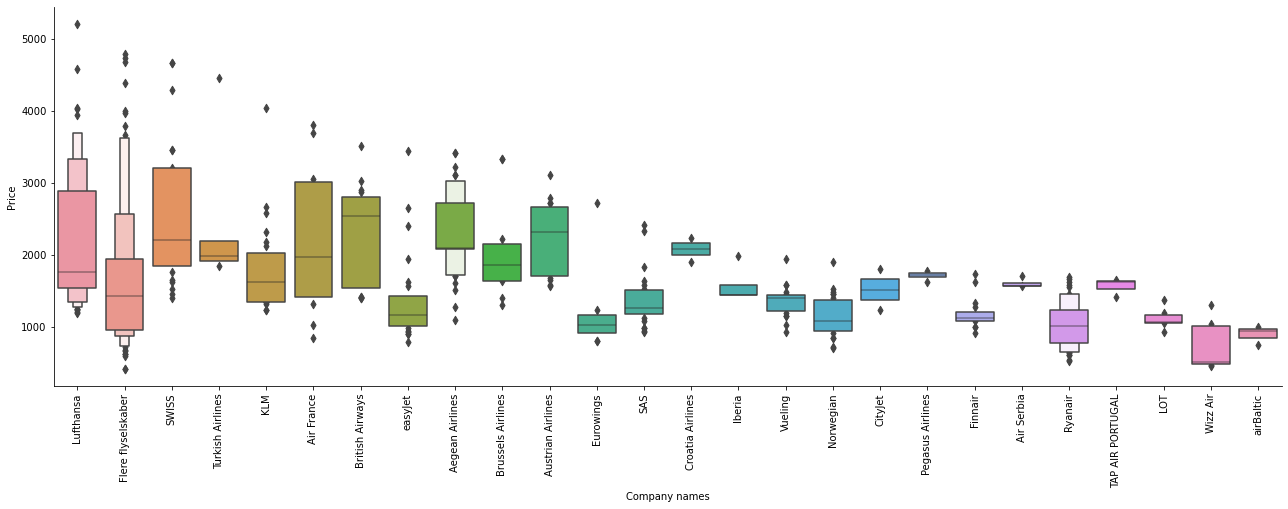

In [13]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
df['Company names'] = df['Company names'].astype(str)

chart = sns.catplot(y = "Price", x = "Company names", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
chart.set_xticklabels(rotation=90)
plt.show()